In [1]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
import keras.backend as K

Using TensorFlow backend.


In [2]:
x = []
y = []
init = 4
init_1 = 100
init_2 = 100
days = 2
for day in range(days):
    for i in range(290):
        #12 - 8.30 Am
        if( i<200 and i>0):
            if(day%6 == 0 and day != 0):
                x.append([i, 0])
                rand = randint(0,5)
                y.append([rand])
            else:
                x.append([i, 1])
                rand = randint(init,50)
                y.append([rand])
                if rand != 50:
                    init = rand
        # 9 - 10.30 Am        
        if( i<248 and i>216):
            if(day%6 == 0 and day != 0):
                x.append([i, 0])
                rand = randint(0,10)
                y.append([rand])
            else:
                x.append([i, 1])
                rand = randint(init_1,800)
                y.append([rand])
                if rand != 300:
                    init_1 = rand
        # 11 Am - 12 Pm
        if( i<288 and i>266):
            if(day%6 == 0 and day != 0):
                x.append([i, 0])
                rand = randint(0,10)
                y.append([rand])
            else:
                x.append([i, 1])
                rand = randint(init_2,600)
                y.append([rand])
                if rand != 600:
                    init_2 = rand

In [3]:
x = np.asarray(x)
y = np.asarray(y)

Text(0,0.5,'Hits')

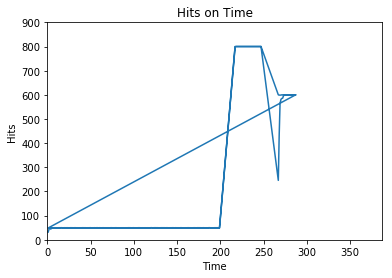

In [4]:
plt.plot(x[:][:, 0],y[:])
plt.title('Hits on Time')
plt.xlabel('Time')
plt.axis([0 , np.max(x[:][:,0])+100   ,0 , np.max(y)+100 ])
plt.ylabel('Hits')

In [5]:
x[:10][:,0]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
x = np.expand_dims(x, axis=1)

In [7]:
maxX = np.max(x[:][:,0])
maxY = np.max(y)
print('x :', maxX)
print('y :', maxY)

x : 287
y : 800


In [8]:
# Normalize data
x = x / np.max(x[:][:,0])
y = y / np.max(y)

In [9]:
# Custom Metrics for Keras
def rmse(y_true, y_pred):
	return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [10]:
model = Sequential()

model.add(LSTM(units=96, return_sequences=True, input_shape=(x.shape[1], 2)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.summary()

opt = RMSprop(0.001)

model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mse', 'mae', rmse])

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 96)             38016     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 96)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 96)             74112     
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 96)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 96)             74112     
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 96)             0         
________________________________________________

In [11]:
history = model.fit(x,y, epochs=300, batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/300
502/502 [==============================] - 3s 6ms/step - loss: 0.1353 - mse: 0.1353 - mae: 0.2146 - rmse: 0.2146
Epoch 2/300
502/502 [==============================] - 0s 346us/step - loss: 0.0936 - mse: 0.0936 - mae: 0.2581 - rmse: 0.2581
Epoch 3/300
502/502 [==============================] - 0s 266us/step - loss: 0.0751 - mse: 0.0751 - mae: 0.2239 - rmse: 0.2239
Epoch 4/300
502/502 [==============================] - 0s 295us/step - loss: 0.0607 - mse: 0.0607 - mae: 0.1852 - rmse: 0.1852
Epoch 5/300
502/502 [==============================] - 0s 401us/step - loss: 0.0553 - mse: 0.0553 - mae: 0.1743 - rmse: 0.1743
Epoch 6/300
502/502 [==============================] - 0s 402us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.1719 - rmse: 0.1719
Epoch 7/300
502/502 [==============================] - 0s 338us/step - loss: 0.0507 - mse: 0.0507 - mae: 0.1714 - rmse: 0.1714
Epoch 8/300
502/502 [==============================] - 0s 395us/s

502/502 [==============================] - 0s 311us/step - loss: 0.0454 - mse: 0.0454 - mae: 0.1436 - rmse: 0.1436
Epoch 64/300
502/502 [==============================] - 0s 337us/step - loss: 0.0414 - mse: 0.0414 - mae: 0.1424 - rmse: 0.1424
Epoch 65/300
502/502 [==============================] - 0s 342us/step - loss: 0.0447 - mse: 0.0447 - mae: 0.1407 - rmse: 0.1407
Epoch 66/300
502/502 [==============================] - 0s 246us/step - loss: 0.0462 - mse: 0.0462 - mae: 0.1421 - rmse: 0.1421
Epoch 67/300
502/502 [==============================] - 0s 270us/step - loss: 0.0458 - mse: 0.0458 - mae: 0.1419 - rmse: 0.1419
Epoch 68/300
502/502 [==============================] - 0s 429us/step - loss: 0.0414 - mse: 0.0414 - mae: 0.1380 - rmse: 0.1380
Epoch 69/300
502/502 [==============================] - 0s 438us/step - loss: 0.0416 - mse: 0.0416 - mae: 0.1376 - rmse: 0.1376
Epoch 70/300
502/502 [==============================] - 0s 394us/step - loss: 0.0457 - mse: 0.0457 - mae: 0.1411 - rm

502/502 [==============================] - 0s 326us/step - loss: 0.0048 - mse: 0.0048 - mae: 0.0364 - rmse: 0.0364
Epoch 127/300
502/502 [==============================] - 0s 269us/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0346 - rmse: 0.0346
Epoch 128/300
502/502 [==============================] - 0s 302us/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0327 - rmse: 0.0327
Epoch 129/300
502/502 [==============================] - 0s 420us/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0300 - rmse: 0.0300
Epoch 130/300
502/502 [==============================] - 0s 389us/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0327 - rmse: 0.0327
Epoch 131/300
502/502 [==============================] - 0s 376us/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0303 - rmse: 0.0303
Epoch 132/300
502/502 [==============================] - 0s 500us/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0298 - rmse: 0.0298
Epoch 133/300
502/502 [==============================] - 0s 448us/step - loss: 0.0023 - mse: 0.0023 - mae: 0.02

502/502 [==============================] - 0s 547us/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0182 - rmse: 0.0182
Epoch 190/300
502/502 [==============================] - 0s 540us/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0204 - rmse: 0.0204
Epoch 191/300
502/502 [==============================] - 0s 543us/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0171 - rmse: 0.0171
Epoch 192/300
502/502 [==============================] - 0s 540us/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0165 - rmse: 0.0165
Epoch 193/300
502/502 [==============================] - 0s 562us/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0194 - rmse: 0.0194
Epoch 194/300
502/502 [==============================] - 0s 549us/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0185 - rmse: 0.0185
Epoch 195/300
502/502 [==============================] - 0s 539us/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0191 - rmse: 0.0191
Epoch 196/300
502/502 [==============================] - 0s 503us/step - loss: 0.0017 - mse: 0.0017 - mae: 0.01

502/502 [==============================] - 0s 549us/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0151 - rmse: 0.0151
Epoch 252/300
502/502 [==============================] - 0s 544us/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0167 - rmse: 0.0167
Epoch 253/300
502/502 [==============================] - 0s 527us/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0181 - rmse: 0.0181
Epoch 254/300
502/502 [==============================] - 0s 542us/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0165 - rmse: 0.0165
Epoch 255/300
502/502 [==============================] - 0s 537us/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0173 - rmse: 0.0173
Epoch 256/300
502/502 [==============================] - 0s 550us/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0177 - rmse: 0.0177
Epoch 257/300
502/502 [==============================] - 0s 538us/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0161 - rmse: 0.0161
Epoch 258/300
502/502 [==============================] - 0s 536us/step - loss: 0.0011 - mse: 0.0011 - mae: 0.01

In [12]:
# Predicting test
testx = np.array([[248, 1]]) / maxX
prediction = model.predict(np.expand_dims(testx, axis=0))

In [13]:
prediction

array([[0.8993436]], dtype=float32)

In [14]:
prediction*maxY

array([[719.4749]], dtype=float32)

In [15]:
# Predicting all y for accuracy calculation
temp = np.expand_dims(x, axis=0)[0]
y_pred = model.predict(temp)

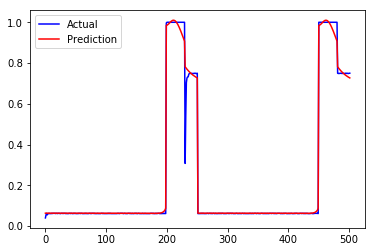

In [16]:
plt.plot(y,'blue', label='Actual')
plt.plot(y_pred,'red', label='Prediction')
plt.legend(loc='upper left')
plt.show()

## Calculating Root Mean Squared Error (RMSE) 
### For accuracy
![RMSE](img/rmse.png)

In [17]:
y_minus = []
def get_Accuracy(y, y_pred):
    for i in range(502):
        y_minus.append((y[i] - y_pred[i])**2)
    return 1-np.sqrt(np.mean(y_minus))

In [18]:
get_Accuracy(y, y_pred)

0.9724187902993223